<h1>Individual Planning Report</h1>


In [11]:
library(tidyverse)

<h2>1. Data Description:</h2>

<p>There are two datasets to examine as part of the project. The first dataset "players.csv" contains player-specific information and cumulative play data, with 196 rows and 7 columns. The second dataset is "sessions.csv" which contains information about each individual session played, with 1535 rows and 5 columns. 

<h3>players.csv</h3>

<h4>Variables/Columns</h4>
<ol>
    <li><u>experience (chr):</u> A categorical variable used to report the player's experience level ("Beginner", "Amateur", "Regular", "Veteran", "Pro").</li>
    <li><u>subscribe (lgl):</u> A boolean categorical variable used to represent whether the players are subscribed or not subscribed.</li>
    <li><u>hashedEmail (chr):</u> A categorical variable used to recognize each player. Each player has a unique code to identify them by.</li>
    <li><u>played_hours (dbl):</u> A numerical variable used to report the player's total hours played.</li>
    <li><u>name (chr):</u> A categorical variable used to identify the player's name.</li>
    <li><u>Age (dbl):</u> A numerical variable used to report the player's age.</li>
</ol>

<h3>sessions.csv</h3>

<h4>Variables/Columns</h4>
<ol>
    <li><u>hashedEmail (chr):</u> A categorical variable used to recognize each player. Each player has a unique code to identify them by.</li>
    <li><u>start_time (chr):</u> The date and time of each session start stored as a character.</li>
    <li><u>end_time (chr):</u> The date and time of each session end stored as a character.</li>
    <li><u>original_start_time (dbl):</u> A numerical variable used as a Unix time identifier to represent the start time.</li>
    <li><u>original_end_time (dbl):</u> A numerical variable used as a Unix time identifier to represent the end time.</li>
</ol>


Issues with the data can include the presence of NA's in quantitative variables, which should be addressed either with mean imputation or removing them. Another issue may be that there is a discrepancy in the proportions of players for each category. There are significantly more Amateurs (63) and very little Pros (14) compared to other categories in the dataset which may skew the results. </p>

In [12]:
num_players_avg <- players |>
               group_by(experience)|>
               summarize(count = n()) |>
               mutate(proportion= count/196)
num_players_avg

experience,count,proportion
<chr>,<int>,<dbl>
Amateur,63,0.32142857
Beginner,35,0.17857143
Pro,14,0.07142857
Regular,36,0.18367347
Veteran,48,0.24489796


<h3>Summary Statistics</h3>

In [21]:
summary_players <- players |>
                   select(played_hours, Age) |>
                   summary()
summary_players

  played_hours          Age       
 Min.   :  0.000   Min.   : 9.00  
 1st Qu.:  0.000   1st Qu.:17.00  
 Median :  0.100   Median :19.00  
 Mean   :  5.846   Mean   :21.14  
 3rd Qu.:  0.600   3rd Qu.:22.75  
 Max.   :223.100   Max.   :58.00  
                   NA's   :2      

For the players.csv dataset, the maximum playtime is 223.10 hours with a minimum of 0.00, and a median of 0.10 and a mean of 5.846. The age has a minimum of 9.00, a mean of 21.14, a median of 19.00 and max of 58.00.

In [24]:
summary_players <- sessions |>
                   select(original_start_time, original_end_time) |>
                   summary()
summary_players

 original_start_time original_end_time  
 Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median :1.719e+12   Median :1.719e+12  
 Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :1.727e+12   Max.   :1.727e+12  
                     NA's   :2          

<h2>2. Questions:</h2>


<p><b>Broad question to address:</b> We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.</p>
<p><b>Specific question to address:</b> Can a player's age and experience predict their total playtime in the dataset?</p>

The data can be used to address these questions as we have identified the exploratory/response variable as the total playtime, and the predictors as the age or skill level. Total playtime serves as the measurement of each player's contribution, whereas age and skill level/experience gives us an image of the demographics to recruit from. In order to get the data into a form where predictive methods can be applied,

<h2>3. Exploratory Data Analysis and Visualization</h2>


In [40]:
players <- read_csv("https://raw.githubusercontent.com/brianyskeung/DSCI-100-Individual-Project/refs/heads/main/players.csv")
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


In [42]:
sessions <- read_csv("https://raw.githubusercontent.com/brianyskeung/DSCI-100-Individual-Project/1172f95bcbace8fc4a71202f495cddfd0475863f/sessions.csv")
glimpse(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


<p>Since the question concerns <u>Experience</u> and <u>Age</u> the predictors and <u>Total Playtime</u> as the explanatory variable, the question only concerns the "players" dataset.</p>

<h3>Mean Values of Quantitative Variables in players.csv dataset:</h3>

In [16]:
mean_values_players <- players |>
                       select(played_hours, Age) |>
                       summarize(mean_played_hours =mean(played_hours ,na.rm = TRUE),
                                mean_age =mean(Age ,na.rm = TRUE))

mean_values_players

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


In [ ]:
The mean played hours is 5.85 and the mean age is 21.14.

<h3>Exploratory Visualizations</h3>

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


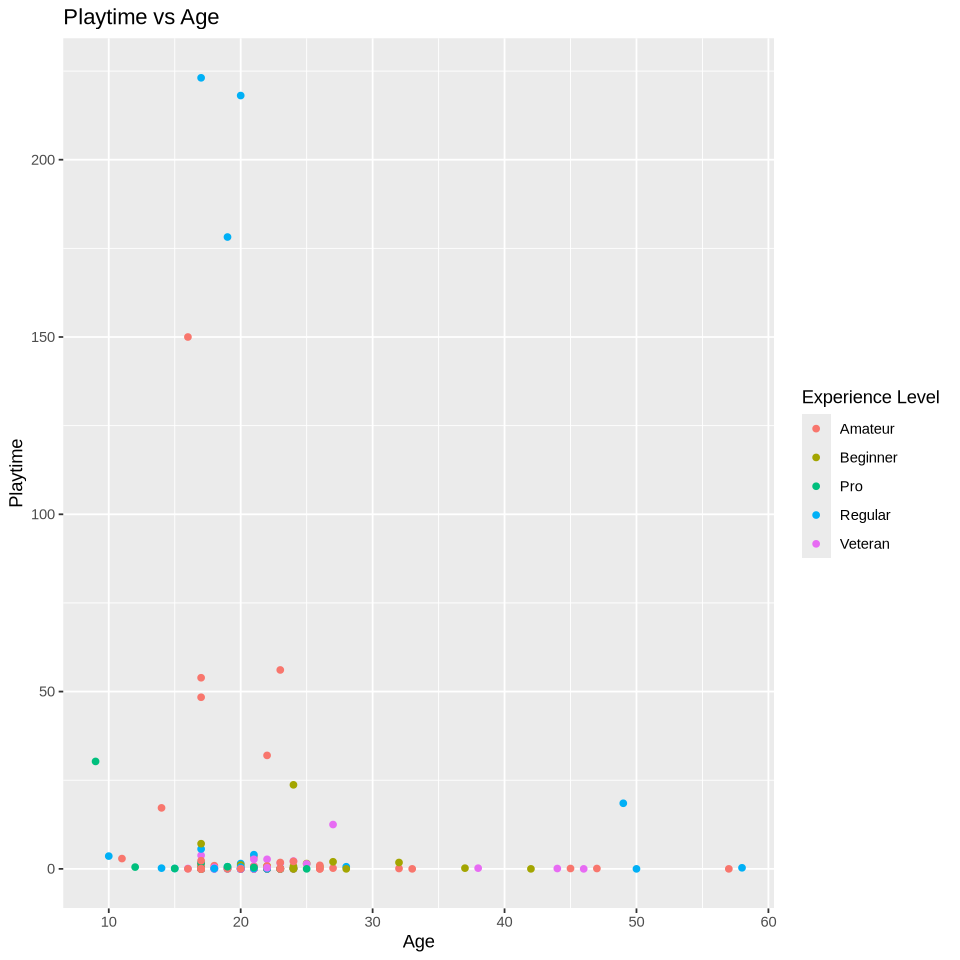

In [35]:
options(repr.plot.width = 8, repr.plot.height = 8) 
players_plot <- players |>
                ggplot(aes(x= Age, y= played_hours)) +
                geom_point(aes(color = experience)) +
                labs(color= "Experience Level", x= "Age", y= "Playtime", title= "Playtime vs Age")

players_plot

<p>The visualisation is a scatterplot of Playtime vs Age color-coded by skill level. This helps determine whether differences in play time can be explained by players’ skill level, their age, or both.</p>

In [18]:
players_avg_playtime_skill <- players |>
                              group_by(experience) |>
                              summarize(mean_playtime = mean(played_hours, na.rm = TRUE))

players_avg_playtime_skill

experience,mean_playtime
<chr>,<dbl>
Amateur,6.0174603
Beginner,1.2485714
Pro,2.6000000
Regular,18.2083333
Veteran,0.6479167


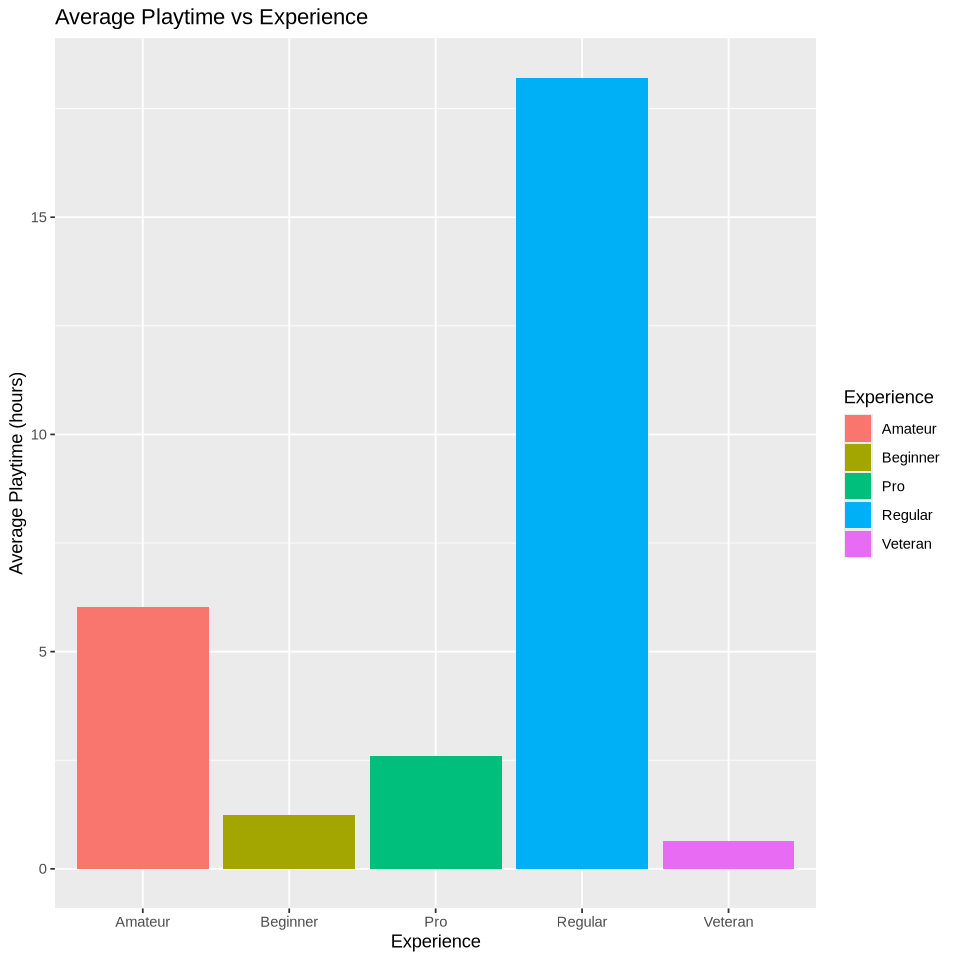

In [34]:
options(repr.plot.width = 8, repr.plot.height = 8) 
playtime_experience_plot <- players_avg_playtime_skill |>
                            ggplot(aes(x= experience, y = mean_playtime, fill= experience)) +
                            geom_bar(stat= "identity") + 
                            labs(x= "Experience", y = "Average Playtime (hours)", title = "Average Playtime vs Experience", fill = "Experience")
playtime_experience_plot

This is a bar plot used to compare the average playtime of each skill level. It appears that "regular" is the highest average of overall playtime, however, this could be skewed by the high outliers presented in the previous scatterplot. These observations indicate that age and skill level seem to have some degree of correlation with the amount of playtime.

<h2>4. Methods and Plan</h2>

My proposed method would be to use <b>multivariable linear regression</b>. This method is appropriate because it allows us to see how multiple predictors (in this case Age and Experience) predict a continous variable (total playtime). Linear regression is useful because it provides an interpretable math equation that can be used to explain how each predictor affects the reponses. In order to apply this model, we need to assume that the predictors have a linear relationship with the response variable. The potential limitation of this model is that there may be significant outliers and that the predictors have a strong correlation to one another. To compare and select the model I would split the dataset into training data and testing data and evaluate metrics like RMSPE to assess how well the predictors can predict on unseen data. I will split the data into 80/20 splits after the dataset has been cleaned and use 5-fold cross validation so that different data points get to be used in the test set so the results can be more accurate.